0       57.853007
1       57.105482
2       56.349084
3       55.584239
4       54.811404
          ...    
716   -179.985929
717   -179.986313
718   -179.986688
719   -179.987054
720   -179.987410
Name: cl phase Y, Length: 721, dtype: float64


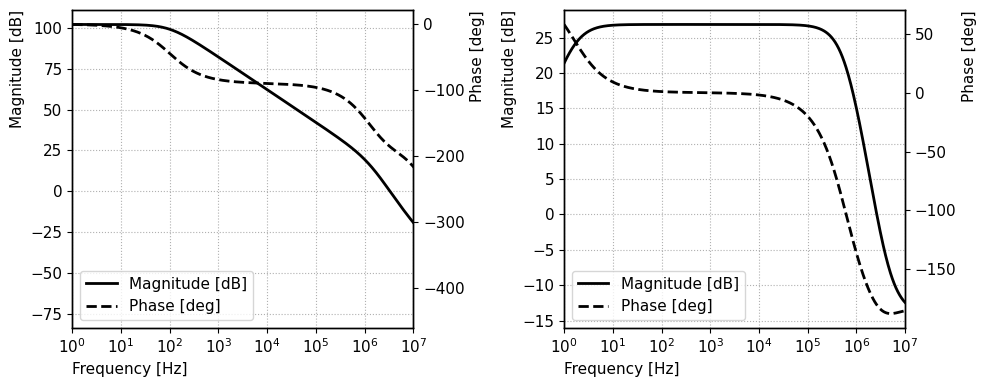

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

# Border width
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['font.weight'] = 'regular'
legend_properties = {'weight':'regular'}
mpl.rcParams['font.size'] = 11

dir = "report_data"
filename = "ota_ac.csv"
data = pd.read_csv(os.path.join(dir, filename))

# set theme and figure size
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
# fig.set_dpi(100)

freq = data["DM Phase Plot X"]
mag = data["DM Gain Plot Y"]
cl_mag = data["cl gain Y"]
cl_phase = data["cl phase Y"]
phase = data["DM Phase Plot Y"]
titles = ["$OL Gain$", "OL Phase"]
print(cl_phase)

lns1 = ax1.semilogx(freq, mag, linewidth = 2, color="black", label="Magnitude [dB]")
ax1_2  = ax1.twinx()
lns2 = ax1_2.semilogx(freq, phase, linewidth = 2, linestyle='--', color="black", label="Phase [deg]")

lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="lower left", prop=legend_properties)

lns3 = ax2.semilogx(freq, cl_mag, linewidth = 2, color="black", label="Magnitude [dB]")
ax2_2  = ax2.twinx()
lns4 = ax2_2.semilogx(freq, cl_phase, linewidth = 2, linestyle='--', color="black", label="Phase [deg]")

lns_leg_2 = lns3 + lns4
labs = [l.get_label() for l in lns_leg_2]
ax2.legend(lns, labs, loc="lower left", prop=legend_properties)

def generate_log_scale(decades):
    scale = []
    for i in range(0, decades):
        scale.append(10**i)
    return scale

ax1.grid(linestyle='dotted')
ax1.set_xlabel('Frequency [Hz]', loc="left")
ax1.set_ylabel('Magnitude [dB]', loc="top")
ax1_2.set_ylabel('Phase [deg]', loc="top")

ax2.grid(linestyle='dotted')
ax2.grid(linestyle='dotted')
ax2.set_xlabel('Frequency [Hz]', loc="left")
ax2.set_ylabel('Magnitude [dB]', loc="top")
ax2_2.set_ylabel('Phase [deg]', loc="top")

ax1.set_xlim(1, 1e7)
ax2.set_xlim(1, 1e7)
fig.tight_layout()
# plt.title('Three Mirror OTA AC Analysis')
ax1.set_xticks(generate_log_scale(8))
ax2.set_xticks(generate_log_scale(8))

filename = "twostage_lp_ac.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = False
if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)

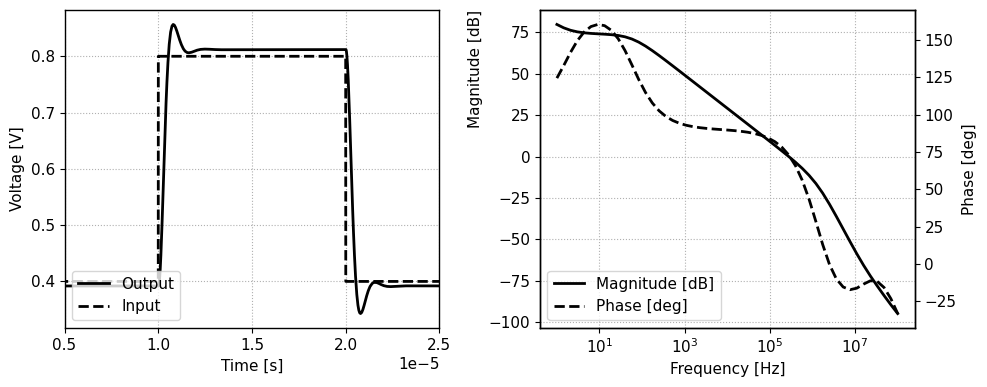

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

# Border width
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['font.weight'] = 'regular'
legend_properties = {'weight':'regular'}
mpl.rcParams['font.size'] = 11

dir = "report_data"

# set theme and figure size
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
# fig.set_dpi(100)

filename = "ota_pulse.csv"
data = pd.read_csv(os.path.join(dir, filename))
t = data["pulse_out X"]
pulse_out = data["pulse_out Y"]
pulse_in = data["pulse_in Y"]

filename = "ota_loop.csv"
data2 = pd.read_csv(os.path.join(dir, filename))
freq = data2["Loop Gain Phase X"]
loop_gain = data2["Loop Gain dB20 Y"]
loop_phase = data2["Loop Gain Phase Y"]

ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0)) 
ax1.plot(t, pulse_out, linewidth = 2, color="black", label="Output")
ax1.plot(t, (pulse_in-0.6)*20+0.6, linewidth = 2, color="black", label="Input", linestyle='--')

lns3 = ax2.semilogx(freq, loop_gain, linewidth = 2, color="black", label="Magnitude [dB]")
ax2_2  = ax2.twinx()
lns4 = ax2_2.semilogx(freq, loop_phase, linewidth = 2, linestyle='--', color="black", label="Phase [deg]")

lns_leg_2 = lns3 + lns4
labs = [l.get_label() for l in lns_leg_2]
ax2.legend(lns, labs, loc="lower left", prop=legend_properties)

def generate_log_scale(decades):
    scale = []
    for i in range(0, decades):
        scale.append(10**i)
    return scale

ax1.legend(loc="lower left")
ax1.set_xlim(0.5e-5, 0.25e-4)
ax1.grid(linestyle='dotted')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Voltage [V]')

ax2.grid(linestyle='dotted')
ax2.grid(linestyle='dotted')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Magnitude [dB]', loc="top")
ax2_2.set_ylabel('Phase [deg]')

fig.tight_layout()
# plt.title('Three Mirror OTA AC Analysis')

filename = "twostage_lp_ac.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = False
if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)

Saving to ../report/imgs\ota_ac_cl.pdf


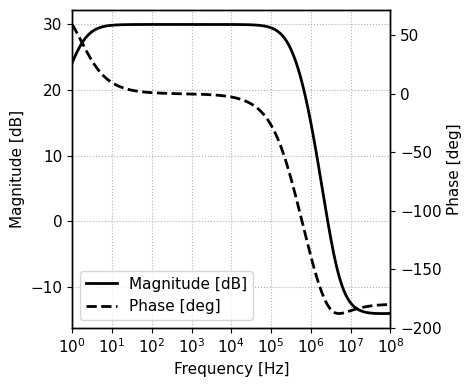

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

# Border width
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['font.weight'] = 'regular'
legend_properties = {'weight':'regular'}
mpl.rcParams['font.size'] = 11

dir = "report_data"
filename = "ota_ac.csv"
data = pd.read_csv(os.path.join(dir, filename))

# set theme and figure size
fig, ax1 = plt.subplots()
fig.set_size_inches(5, 4)
# fig.set_dpi(100)

freq = data["DM Phase Plot X"]
mag = data["cl gain Y"]
phase = data["cl phase Y"]
titles = ["$OL Gain$", "OL Phase"]

lns1 = ax1.semilogx(freq, mag, linewidth = 2, color="black", label="Magnitude [dB]")
ax1_2  = ax1.twinx()
lns2 = ax1_2.semilogx(freq, phase, linewidth = 2, linestyle='--', color="black", label="Phase [deg]")

lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="lower left", prop=legend_properties)

def generate_log_scale(decades):
    scale = []
    for i in range(0, decades):
        scale.append(10**i)
    return scale

ax1.grid(linestyle='dotted')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('Magnitude [dB]')
ax1_2.set_ylabel('Phase [deg]')

ax1.set_box_aspect(1)
ax1.set_xlim(1, 1e8)
#ax1.set_ylim(-30, 110)
#ax1_2.set_ylim(-250, 60)
fig.tight_layout()
# plt.title('Three Mirror OTA AC Analysis')
ax1.set_xticks(generate_log_scale(9))

filename = "ota_ac_cl.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = True
if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)

Saving to ../report/imgs\ota_ac_ol.pdf


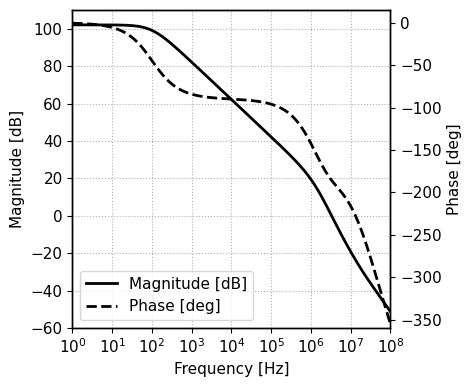

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

# Border width
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['font.weight'] = 'regular'
legend_properties = {'weight':'regular'}
mpl.rcParams['font.size'] = 11

dir = "report_data"
filename = "ota_ac.csv"
data = pd.read_csv(os.path.join(dir, filename))

# set theme and figure size
fig, ax1 = plt.subplots()
fig.set_size_inches(5, 4)
# fig.set_dpi(100)

freq = data["DM Phase Plot X"]
mag = data["DM Gain Plot Y"]
phase = data["DM Phase Plot Y"]
titles = ["$OL Gain$", "OL Phase"]

lns1 = ax1.semilogx(freq, mag, linewidth = 2, color="black", label="Magnitude [dB]")
ax1_2  = ax1.twinx()
lns2 = ax1_2.semilogx(freq, phase, linewidth = 2, linestyle='--', color="black", label="Phase [deg]")

lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="lower left", prop=legend_properties)

def generate_log_scale(decades):
    scale = []
    for i in range(0, decades):
        scale.append(10**i)
    return scale

ax1.set_box_aspect(1)
ax1.grid(linestyle='dotted')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('Magnitude [dB]')
ax1_2.set_ylabel('Phase [deg]')

ax1.set_xlim(1, 1e8)
ax2.set_xlim(1, 1e8)
ax1.set_ylim(-60, 110)
ax1_2.set_ylim(-360, 15)
fig.tight_layout()
# plt.title('Three Mirror OTA AC Analysis')
ax1.set_xticks(generate_log_scale(9))
ax2.set_xticks(generate_log_scale(9))

filename = "ota_ac_ol.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = True
if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)

Saving to ../report/imgs\ota_ac_loop.pdf


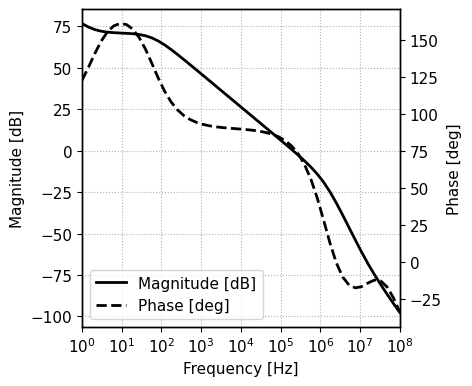

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

# Border width
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['font.weight'] = 'regular'
legend_properties = {'weight':'regular'}
mpl.rcParams['font.size'] = 11

dir = "report_data"

# set theme and figure size
fig, ax2 = plt.subplots()
fig.set_size_inches(5, 4)
# fig.set_dpi(100)

filename = "ota_loop.csv"
data2 = pd.read_csv(os.path.join(dir, filename))
freq = data2["Loop Gain Phase X"]
loop_gain = data2["Loop Gain dB20 Y"]
loop_phase = data2["Loop Gain Phase Y"]

lns3 = ax2.semilogx(freq, loop_gain, linewidth = 2, color="black", label="Magnitude [dB]")
ax2_2  = ax2.twinx()
lns4 = ax2_2.semilogx(freq, loop_phase, linewidth = 2, linestyle='--', color="black", label="Phase [deg]")

lns_leg_2 = lns3 + lns4
labs = [l.get_label() for l in lns_leg_2]
ax2.legend(lns_leg_2, labs, loc="lower left", prop=legend_properties)

def generate_log_scale(decades):
    scale = []
    for i in range(0, decades):
        scale.append(10**i)
    return scale

ax2.set_xlim(1, 1e7)
ax2.set_box_aspect(1)
ax2.grid(linestyle='dotted')
ax2.grid(linestyle='dotted')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Magnitude [dB]')
ax2_2.set_ylabel('Phase [deg]')
ax2.set_xticks(generate_log_scale(9))

fig.tight_layout()
# plt.title('Three Mirror OTA AC Analysis')

filename = "ota_ac_loop.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = True
if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)

Saving to ../report/imgs\ota_pulse.pdf


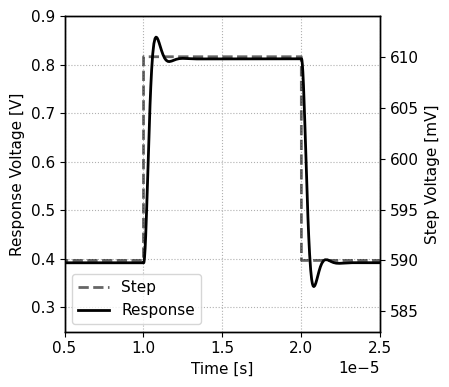

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

# Border width
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['font.weight'] = 'regular'
legend_properties = {'weight':'regular'}
mpl.rcParams['font.size'] = 11

dir = "report_data"

# set theme and figure size
fig, ax2 = plt.subplots()
fig.set_size_inches(5, 4)
# fig.set_dpi(100)

filename = "ota_pulse.csv"
data = pd.read_csv(os.path.join(dir, filename))
t = data["pulse_out X"]
pulse_out = data["pulse_out Y"]
pulse_in = data["pulse_in Y"]

lns4 = ax2.plot(t, pulse_out, linewidth = 2, color="black", label="Response")
ax2_2  = ax2.twinx()
lns3 = ax2_2.plot(t, (pulse_in-0.6)*1000+600, linewidth = 2, color="black", label="Step",linestyle='--', alpha=0.6)

lns_leg_2 = lns3 + lns4
labs = [l.get_label() for l in lns_leg_2]
ax2.legend(lns_leg_2, labs, loc="lower left", prop=legend_properties)

ax2.set_box_aspect(1)
ax2.set_xlim(0.5e-5, 0.25e-4)
ax2.grid(linestyle='dotted')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Response Voltage [V]')
ax2_2.set_ylim(583, 614)
ax2.set_ylim(0.25, 0.9)
ax2_2.set_ylabel('Step Voltage [mV]')

fig.tight_layout()

filename = "ota_pulse.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = True
if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)

<>:31: SyntaxWarning: invalid escape sequence '\i'
<>:46: SyntaxWarning: invalid escape sequence '\i'
<>:31: SyntaxWarning: invalid escape sequence '\i'
<>:46: SyntaxWarning: invalid escape sequence '\i'
C:\Users\techu\AppData\Local\Temp\ipykernel_32656\42166283.py:31: SyntaxWarning: invalid escape sequence '\i'
  lns2 = ax1_1.semilogx(freq, noise_int, linewidth = 2, color="black", label="$\int$Noise rms", linestyle='--')
C:\Users\techu\AppData\Local\Temp\ipykernel_32656\42166283.py:46: SyntaxWarning: invalid escape sequence '\i'
  ax1_1.set_ylabel('$\int$ Noise rms [$V/ \sqrt{Hz}$]')


Saving to ../report/imgs\ota_noise.pdf


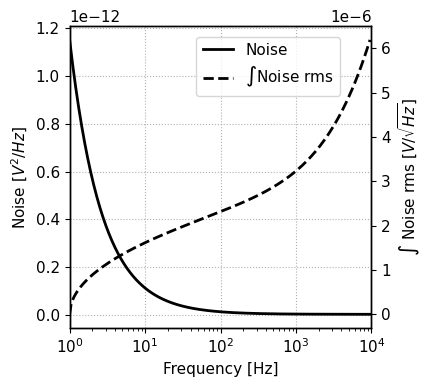

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
from scipy import integrate

# Border width
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['font.weight'] = 'regular'
legend_properties = {'weight':'regular'}
mpl.rcParams['font.size'] = 11

dir = "report_data"
filename = "ota_noise.csv"
data = pd.read_csv(os.path.join(dir, filename))

# set theme and figure size
fig, ax1 = plt.subplots()
fig.set_size_inches(5, 4)
# fig.set_dpi(100)

freq = data["input noise; V**2 / Hz X"][:200]
noise = data["input noise; V**2 / Hz Y"][:200]

lns1 = ax1.semilogx(freq, noise, linewidth = 2, color="black", label="Noise")
ax1_1 = ax1.twinx()
ax1_1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0)) 
noise_int = np.sqrt(integrate.cumulative_trapezoid(noise, freq, initial=0))
lns2 = ax1_1.semilogx(freq, noise_int, linewidth = 2, color="black", label="$\int$Noise rms", linestyle='--')

lns_leg_2 = lns1 + lns2
labs = [l.get_label() for l in lns_leg_2]
ax1.legend(lns, labs, loc=(0.42, 0.77), prop=legend_properties)

def generate_log_scale(decades):
    scale = []
    for i in range(0, decades):
        scale.append(10**i)
    return scale

ax1.grid(linestyle='dotted')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('Noise [$V^2/Hz$]')
ax1_1.set_ylabel('$\int$ Noise rms [$V/ \sqrt{Hz}$]')

ax1.set_box_aspect(1)
ax1.set_xlim(1, 1e4)
ax2.set_xlim(1, 1e4)
fig.tight_layout()
# plt.title('Three Mirror OTA AC Analysis')
ax1.set_xticks(generate_log_scale(5))
ax2.set_xticks(generate_log_scale(5))

filename = "ota_noise.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = True
if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)

Saving to ../report/imgs\ota_ac_cmrr_psrr.pdf


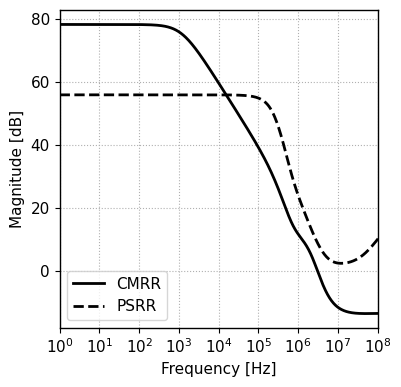

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

# Border width
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['font.weight'] = 'regular'
legend_properties = {'weight':'regular'}
mpl.rcParams['font.size'] = 11

dir = "report_data"

# set theme and figure size
fig, ax2 = plt.subplots()
fig.set_size_inches(5, 4)
# fig.set_dpi(100)

filename = "ota_ac.csv"
data2 = pd.read_csv(os.path.join(dir, filename))
freq = data2["CMRR Plot X"]
cmrr = data2["CMRR Plot Y"]
psr = (-1)*(data2["psr Y"]-data2["cl gain Y"])

ax2.semilogx(freq, cmrr, linewidth = 2, color="black", label="CMRR")
ax2.semilogx(freq, psr, linewidth = 2, linestyle='--', color="black", label="PSRR")

def generate_log_scale(decades):
    scale = []
    for i in range(0, decades):
        scale.append(10**i)
    return scale

ax2.set_xlim(1, 1e8)
ax2.set_box_aspect(1)
ax2.legend(loc="lower left")
ax2.grid(linestyle='dotted')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Magnitude [dB]')
ax2_2.set_ylabel('Phase [deg]')
ax2.set_xticks(generate_log_scale(9))

fig.tight_layout()
# plt.title('Three Mirror OTA AC Analysis')

filename = "ota_ac_cmrr_psrr.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = True

if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)

<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
C:\Users\techu\AppData\Local\Temp\ipykernel_22148\4227351647.py:34: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_xlabel('Input Amplitude [$\mu V$]')


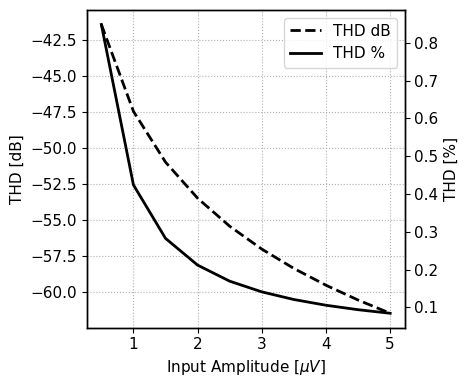

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

# Border width
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['font.weight'] = 'regular'
legend_properties = {'weight':'regular'}
mpl.rcParams['font.size'] = 11

# set theme and figure size
fig, ax2 = plt.subplots()
fig.set_size_inches(5, 4)
# fig.set_dpi(100)

amp = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
#thd = [-96.298598, -96.302736, -96.300842, -96.298584, -96.333712, -96.217902, -96.566267, -96.424087, -96.55212, -96.538754]
thd = [-41.427659, -47.450427, -50.973912, -53.474363, -55.415993, -57.000534, -58.34304, -59.505176, -60.530512, -61.44834]
thd_pct = [10**(x/20)*100 for x in thd]

lns1 = ax2.plot(amp, thd, linewidth = 2, color="black", label="THD dB",linestyle='--')
ax2_2 = ax2.twinx()
lns2 = ax2_2.plot(amp, thd_pct, linewidth = 2, color="black", label="THD %")

lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="upper right", prop=legend_properties)

ax2.set_box_aspect(1)
ax2.grid(linestyle='dotted')
ax2.set_xlabel('Input Amplitude [$\mu V$]')
ax2.set_ylabel('THD [dB]')
ax2_2.set_ylabel('THD [%]')

fig.tight_layout()

filename = "ota_pulse.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = False
if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)